# AEDWIP
STAR/HTSeq counts of Salmon unmapped reads
find htseq count files for reference ids

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import re
import upsetplot as up
from utils.upsetPlotData import UpSetPlotData
dataRootDir = "/private/groups/kimlab/kras.ipsc/data"
imgOutDir = Path('./img')
imgOutDir.mkdir(parents=True, exist_ok=True)


In [2]:
searchPath = dataRootDir + "/" + '{"bulk","exo"}' + ".data"
pathMatch = "*/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out"
htSeqCountFiles = !find $searchPath -path $pathMatch  
print(len(htSeqCountFiles))
htSeqCountFiles[0:3]

18


['/private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.1/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out',
 '/private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.2/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out',
 '/private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.3/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out']

In [3]:
def selectBulk(item) :
    ret = re.search("bulk", item)
    return( ret )

def selectExo(item):
    ret = re.search("exo", item)
    return( ret )

def selectCtrl(item):
    ret = re.search("ctrl", item)
    return( ret )

def selectKras(item):
    ret = re.search("kras.[1,2,3]", item)
    return( ret )

def selectDay5(item):
    ret = re.search("day.5", item)
    return( ret )

def selectDay7(item):
    ret = re.search("day.7", item)
    return( ret )
    
bulkFiles     = list(filter(selectBulk, htSeqCountFiles))

bulkCtrlFiles = list(filter(selectCtrl, bulkFiles))
bulkDay5CtrlFiles = list(filter(selectDay5, bulkCtrlFiles))
bulkDay7CtrlFiles = list(filter(selectDay7, bulkCtrlFiles))

bulkKrasFiles = list(filter(selectKras, bulkFiles))
bulkDay5KrasFiles = list(filter(selectDay5, bulkKrasFiles))
bulkDay7KrasFiles = list(filter(selectDay7, bulkKrasFiles))

    
# all exo libraries are day 5
exoDay5Files     = list(filter(selectExo, htSeqCountFiles))
exoCtrlDay5Files = list(filter(selectCtrl, exoDay5Files))
exoKrasDay5Files = list(filter(selectKras, exoDay5Files))
           
           
fileSetsDict = {"bulkDay5CtrlFiles":bulkDay5CtrlFiles, 
                "bulkDay7CtrlFiles":bulkDay7CtrlFiles, 
                "bulkDay5KrasFiles":bulkDay5KrasFiles,
                "bulkDay7KrasFiles":bulkDay7KrasFiles,  
                "bulkDay7KrasFiles":bulkDay7KrasFiles, 
                "bulkDay7KrasFiles":bulkDay7KrasFiles,
                "exoCtrlDay5Files":exoCtrlDay5Files, 
                "exoKrasDay5Files":exoKrasDay5Files}

# for f in [bulkDay5CtrlFiles, bulkDay7CtrlFiles, bulkDay5KrasFiles,
#         bulkDay7KrasFiles,  exoCtrlDay5Files, exoKrasDay5Files]:
for key,fileList in fileSetsDict.items():
    print("\n******* {}".format(key))
    for f in fileList:
        print(f)


******* bulkDay5CtrlFiles
/private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.1/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out
/private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.2/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out
/private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.3/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out

******* bulkDay7CtrlFiles
/private/groups/kimlab/kras.ipsc/data/bulk.data/day.7/ctrl.1/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out
/private/groups/kimlab/kras.ipsc/data/bulk.data/day.7/ctrl.2/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out
/private/groups/kimlab/kras.ipsc/data/bulk.data/day.7/ctrl.3/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out

******* bulkDay

In [4]:
def loadAndCleanHTSeqCounts(filePath):
    df = pd.read_csv(filePath, sep="\t", names=['gene', "count"])
    # the last 5 rows are stats
#                              gene    count
#     60650       ENSG00000288699.1        0
#     60651            __no_feature  1541926
#     60652             __ambiguous    12650
#     60653         __too_low_aQual        0
#     60654           __not_aligned        0
#     60655  __alignment_not_unique   159190 

    retDF = df.iloc[:-5,:]
    statsDF = df.iloc[-5:,:]
    
    # select rows where count != 0
    selectRows = retDF.loc[:, "count"] != 0
    retDF = retDF.loc[selectRows, :]

    return (retDF, statsDF)

aedwipDF, aedwipStatsDF = loadAndCleanHTSeqCounts(bulkDay5CtrlFiles[0])
print(aedwipDF.head())
print(aedwipDF.tail(n=6))
print(aedwipStatsDF)

                  gene  count
3   ENSG00000000457.14      9
4   ENSG00000000460.17      3
7   ENSG00000001036.14      2
9   ENSG00000001167.14      1
10  ENSG00000001460.18      1
                    gene  count
60531  ENSG00000288551.1      1
60551  ENSG00000288571.1      2
60572  ENSG00000288595.1      1
60574  ENSG00000288597.1     22
60586  ENSG00000288611.1      1
60632  ENSG00000288675.1     10
                         gene    count
60651            __no_feature  1541926
60652             __ambiguous    12650
60653         __too_low_aQual        0
60654           __not_aligned        0
60655  __alignment_not_unique   159190


In [5]:
def getGenes(HTSeqCountfileList):
    geneList = []
    for f in HTSeqCountfileList:
        #print(f)
        df, statsDF = loadAndCleanHTSeqCounts(f)
        geneList = geneList + df.loc[:, "gene"].to_list() # returns numpy array
#         geneList = geneList + df.loc[:, "gene"].tolist()
#         geneList = list(geneList)
        
    print("len(gl) :{}".format(len(geneList)))
    ret = np.unique(geneList)
    #print("len(ret):{}".format(len(ret)))
    
    return(ret)

bulkDay5CtrlGenesList = getGenes(bulkDay5CtrlFiles)
print(bulkDay5CtrlGenesList[0:5])
print(bulkDay5CtrlGenesList[-5:])

len(gl) :29413
['ENSG00000000419.13' 'ENSG00000000457.14' 'ENSG00000000460.17'
 'ENSG00000001036.14' 'ENSG00000001167.14']
['ENSG00000288611.1' 'ENSG00000288663.1' 'ENSG00000288675.1'
 'ENSG00000288679.1' 'ENSG00000288686.1']


In [6]:
geneSetDict = {}
for key,HTSeqCountfileList in fileSetsDict.items():
    geneSet = set( getGenes( HTSeqCountfileList ) )
    geneSetDict[key] = geneSet

len(gl) :29413
len(gl) :30719
len(gl) :26270
len(gl) :26903
len(gl) :31869
len(gl) :43088


In [7]:
geneSetDict.keys()

dict_keys(['bulkDay5CtrlFiles', 'bulkDay7CtrlFiles', 'bulkDay5KrasFiles', 'bulkDay7KrasFiles', 'exoCtrlDay5Files', 'exoKrasDay5Files'])

In [8]:
print(type(geneSetDict['bulkDay5CtrlFiles']))

<class 'set'>


# create upset Plot

<class 'pathlib.PosixPath'>


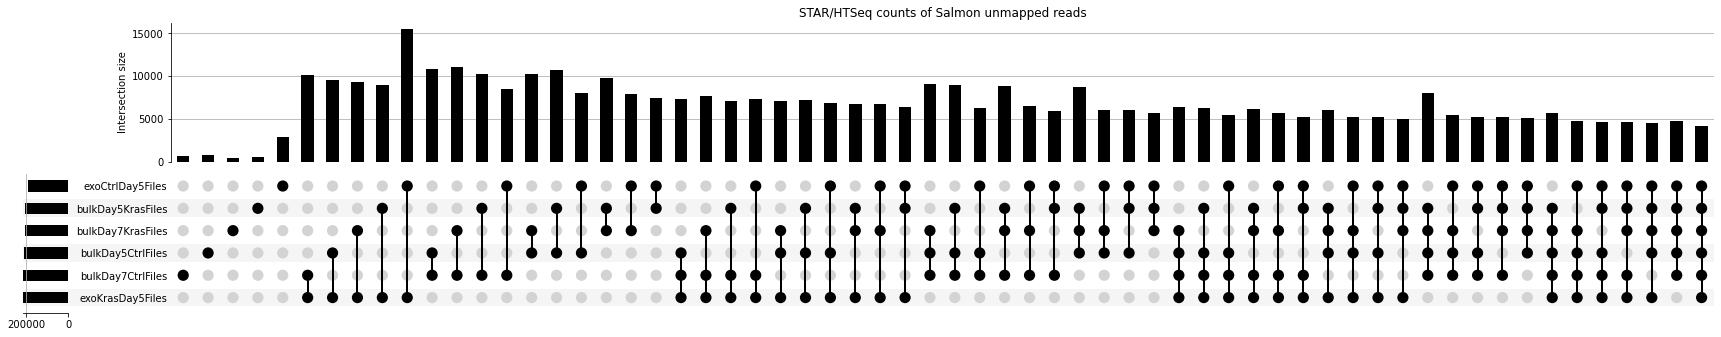

In [10]:
unMappedUpData = UpSetPlotData( geneSetDict )
figureWidthInInches = 8
figureHeightInInches = 3
fig = plt.figure(figsize=(figureWidthInInches,figureHeightInInches))

subPlotDict = up.plot(unMappedUpData.plotData, fig)
mainPanel = fig.axes[3]
mainPanel.set_title("STAR/HTSeq counts of Salmon unmapped reads")

outfile= imgOutDir.joinpath( "upsetplotSTAR-HTSeqCountsOfSalmonUnmappedReads.png")
fig.savefig(outfile, dpi=300, bbox_inches='tight')